# Get a basic estimate for surface brightness

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os
import astropy.units as u
from astropy.io import fits
# And also DESC packages to get the data path
import GCRCatalogs
from GCRCatalogs import GCRQuery
import desc_dc2_dm_data

import seaborn as sns

In [2]:
# We load the catalog with addons
cosmo=GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")

In [70]:
#small healpix sample for testing
for healpix in cosmo.available_healpix_pixels:
    if healpix in [9556, 9558, 9559]:
    #, 9560, 9683, 9684, 9685, 9686, 9687, 9688, 9812, 9813, 9814, 9815, 9816, 9940, 9941, 9942, 9943, 9944, 10068, 10069, 10070, 10071, 10072, 10195,10196,10197, 10198, 10199
        quant = cosmo.get_quantities(['size_true','mag_true_r_lsst', 'halo_id'], native_filters=f"healpix_pixel == {healpix}")
        # , filters="mag_true_r_lsst<28"
#, filters='halo_id>0'

In [71]:
size = quant['size_true']*u.arcsec
mag  = quant['mag_true_r_lsst']*u.ABmag
halo_id = quant['halo_id']

In [72]:
is_UFD = halo_id<0


In [75]:
flux = mag.to(u.erg/u.s/u.cm**2/u.Hz)
flux_hlr = flux/2. # light in half-light radius is approx half the flux
SB_hlr   = flux_hlr/(np.pi*size**2) # flux over area; flux per square arcsec
SB_hlr_mag  = (SB_hlr.value*(u.erg/(u.Hz*u.s*u.cm**2))).to(u.ABmag) # hack to get mag/arcsec**2 to work 

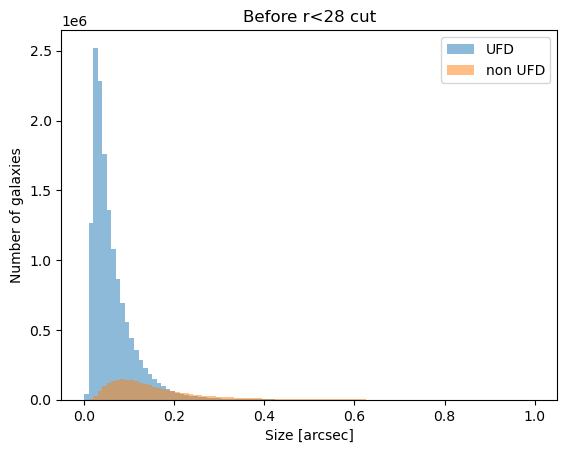

In [78]:
plt.hist(size.value[is_UFD], label='UFD', alpha=.5, bins=np.linspace(0,1,100)) 
plt.hist(size.value[~is_UFD], label='non UFD', alpha=.5, bins=np.linspace(0,1,100))
plt.title("Before r<28 cut")
plt.xlabel("Size [arcsec]")
plt.ylabel("Number of galaxies")
plt.legend()

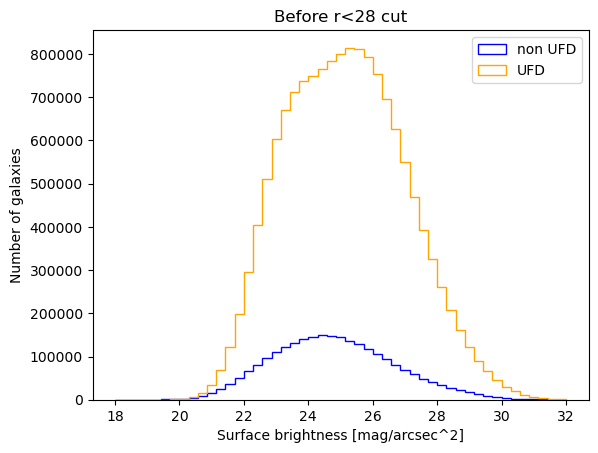

In [99]:
plt.hist(SB_hlr_mag.value[~is_UFD], label='non UFD',bins=np.linspace(18,32,50), fill=False, histtype='step', color='blue')
plt.hist((SB_hlr_mag.value)[is_UFD], label='UFD', bins=np.linspace(18,32,50), fill=False, histtype='step', color='orange')
plt.title("Before r<28 cut")
plt.xlabel("Surface brightness [mag/arcsec^2]")
plt.ylabel("Number of galaxies")
plt.legend()

In [45]:
len(SB_hlr_mag.value[~is_UFD]), len(SB_hlr_mag.value[is_UFD])

(2500283, 14748511)

In [90]:
#small healpix sample for testing
for healpix in cosmo.available_healpix_pixels:
    if healpix in [9556, 9558, 9559]:
    #, 9560, 9683, 9684, 9685, 9686, 9687, 9688, 9812, 9813, 9814, 9815, 9816, 9940, 9941, 9942, 9943, 9944, 10068, 10069, 10070, 10071, 10072, 10195,10196,10197, 10198, 10199
        quant_filtered = cosmo.get_quantities(['size_true','mag_true_r_lsst'], native_filters=f"healpix_pixel == {healpix}", filters=["mag_true_r_lsst<28", "halo_id>0"])

In [91]:
size_filt = quant_filtered['size_true']*u.arcsec
mag_filt  = quant_filtered['mag_true_r_lsst']*u.ABmag

In [93]:
flux_filt = mag_filt.to(u.erg/u.s/u.cm**2/u.Hz)
flux_hlr_filt = flux_filt/2. # light in half-light radius is approx half the flux
SB_hlr_filt   = flux_hlr_filt/(np.pi*size_filt**2) # flux over area; flux per square arcsec
SB_hlr_mag_filt  = (SB_hlr_filt.value*(u.erg/(u.Hz*u.s*u.cm**2))).to(u.ABmag) # hack to get mag/arcsec**2 to work 

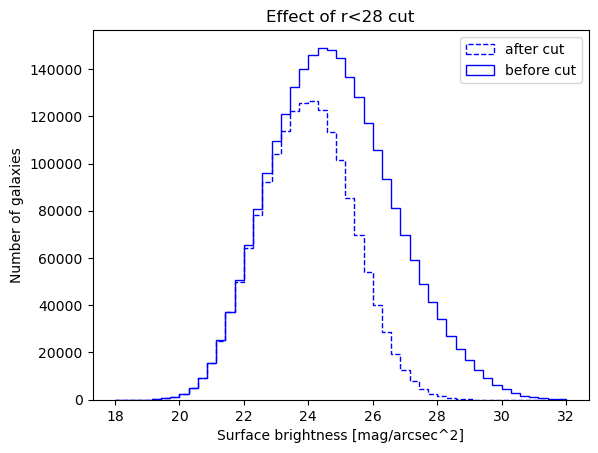

In [102]:
plt.hist(SB_hlr_mag_filt.value, label='after cut',bins=np.linspace(18,32,50), fill=False, linestyle='dashed', histtype='step', color='blue')
plt.hist((SB_hlr_mag.value[~is_UFD]), label='before cut', bins=np.linspace(18,32,50), fill=False, histtype='step', color='blue')
plt.title("Effect of r<28 cut")
plt.xlabel("Surface brightness [mag/arcsec^2]")
plt.ylabel("Number of galaxies")
plt.legend()

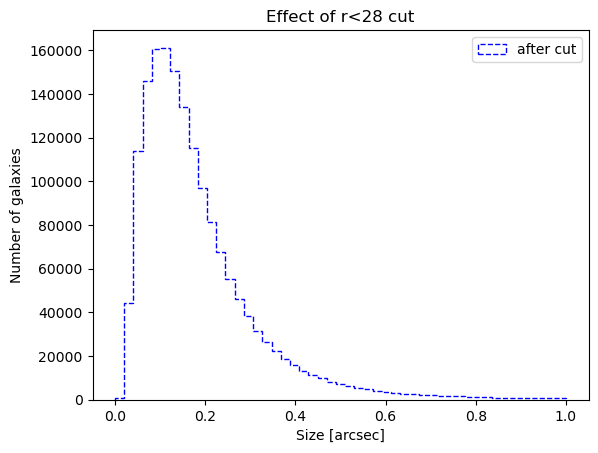

In [107]:
plt.hist(size_filt.value, label='after cut',bins=np.linspace(0,1,50), fill=False, linestyle='dashed', histtype='step', color='blue')

plt.title("Effect of r<28 cut")
plt.xlabel("Size [arcsec]")
plt.ylabel("Number of galaxies")
plt.legend()

## Get only the galaxies that are in the hostlibs

In [109]:
hostlib_path = "/global/cfs/cdirs/lsst/groups/TD/SN/SNANA/SURVEYS/LSST/ROOT/PLASTICC_DEV/HOSTLIB/70cosmo/"


In [143]:
for file in os.listdir(hostlib_path):
    if "UNMATCHED" in file and file.endswith("70cosmo"):
        print(file)
        hostlib = pd.read_csv(hostlib_path+file, sep=' ', header=17)

UNMATCHED_COSMODC2_GHOST.HOSTLIB_shift_70cosmo


In [144]:
hostlib.columns

Index(['VARNAMES:', 'GALID', 'ZORIG', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'u_obs',
       'u_obs_err', 'g_obs', 'g_obs_err', 'r_obs', 'r_obs_err', 'i_obs',
       'i_obs_err', 'z_obs', 'z_obs_err', 'Y_obs', 'Y_obs_err', 'SQRADIUS',
       'a0_Sersic', 'b0_Sersic', 'n0_Sersic', 'w0_Sersic', 'a1_Sersic',
       'b1_Sersic', 'n1_Sersic', 'w1_Sersic', 'a_rot', 'ELLIPTICITY',
       'LOGMASS', 'LOG_SFR', 'OBJID2', 'ZPHOT_Q000', 'ZPHOT_Q010',
       'ZPHOT_Q020', 'ZPHOT_Q030', 'ZPHOT_Q040', 'ZPHOT_Q050', 'ZPHOT_Q060',
       'ZPHOT_Q070', 'ZPHOT_Q080', 'ZPHOT_Q090', 'ZPHOT_Q100', 'logP50', 'IQR',
       'ZPHOT', 'ZPHOT_ERR', 'IQR_ZPHOT', 'P_ZPHOT', 'NBR_LIST'],
      dtype='object')

In [145]:
galids = hostlib['GALID']

In [146]:
for healpix in cosmo.available_healpix_pixels:
    if healpix in [9556, 9558, 9559]:
        print(healpix)
        filters=[(lambda x: np.isin(x, galids), 'galaxy_id')]
        quant_in_hostlib = cosmo.get_quantities(['size_true','mag_true_r_lsst'], native_filters=f"healpix_pixel == {healpix}", filters=filters)


9556
9558
9559


In [147]:
size_hlib = quant_in_hostlib['size_true']*u.arcsec
mag_hlib  = quant_in_hostlib['mag_true_r_lsst']*u.ABmag
flux_hlib = mag_hlib.to(u.erg/u.s/u.cm**2/u.Hz)
flux_hlr_hlib = flux_hlib/2. # light in half-light radius is approx half the flux
SB_hlr_hlib   = flux_hlr_hlib/(np.pi*size_hlib**2) # flux over area; flux per square arcsec
SB_hlr_mag_hlib  = (SB_hlr_hlib.value*(u.erg/(u.Hz*u.s*u.cm**2))).to(u.ABmag) # hack to get mag/arcsec**2 to work 

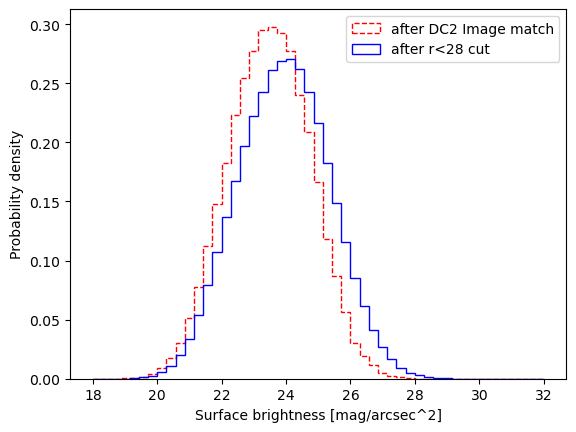

In [150]:
plt.hist(SB_hlr_mag_hlib.value, label='after DC2 Image match', bins=np.linspace(18,32,50), fill=False, linestyle='dashed', histtype='step', color='red', density=True)
plt.hist(SB_hlr_mag_filt.value, label='after r<28 cut', bins=np.linspace(18,32,50), fill=False, linestyle='solid', histtype='step', color='blue', density=True)

plt.xlabel("Surface brightness [mag/arcsec^2]")
plt.ylabel("Probability density")
plt.legend()

In [152]:
np.sum(SB_hlr_mag_hlib.value<26)/len(SB_hlr_mag_hlib)

0.9799046966760415

In [154]:
max(SB_hlr_mag_hlib)

<Magnitude 28.64522 mag(AB)>